In [1]:
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,TensorDataset,Dataset
import time
import numpy as np
import matplotlib.pyplot as plt
import os
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
data=np.load('/home/chase/Boyka/Lyu/data/rainfall/reg/data_reg_2000.npy')
data=np.expand_dims(data,axis=1)
# data=torch.from_numpy(data)
data=torch.FloatTensor(data)
# print(type(data[0][0][0]))
# print(data[0][0][0])
label=np.load('/home/chase/Boyka/Lyu/data/rainfall/reg/label_reg_2000.npy')
print(label.shape)
label=np.expand_dims(label,axis=1)
# label=torch.from_numpy(label)
label=torch.FloatTensor(label)
# print(label[0][0][0])
# print(data.shape,label.shape)
train_x=data[:-400]
test_x=data[-400:]
train_y=label[:-400]
test_y=label[-400:]
print(data.shape,label.shape)

(2000, 8, 8)
torch.Size([2000, 1, 256, 256]) torch.Size([2000, 1, 8, 8])


In [3]:
label[0]

tensor([[[0.9285, 0.2536, 0.4214, 0.7223, 0.8552, 0.4485, 0.9244, 0.6659],
         [0.4143, 0.4263, 0.0936, 0.9330, 0.8984, 0.1050, 0.6380, 0.4451],
         [0.1204, 0.5285, 0.6295, 0.1243, 0.0966, 0.0404, 0.6106, 0.1900],
         [0.4472, 0.0715, 0.9380, 0.5686, 0.2383, 0.4118, 0.9210, 0.1641],
         [0.5661, 0.4672, 0.1826, 0.4114, 0.9027, 0.2735, 0.5198, 0.8364],
         [0.1530, 0.8982, 0.6826, 0.6798, 0.7896, 0.9920, 0.3437, 0.1520],
         [0.7479, 0.0159, 0.0182, 0.9959, 0.9931, 0.4462, 0.4907, 0.6491],
         [0.0077, 0.9726, 0.4786, 0.5116, 0.1388, 0.2021, 0.5410, 0.6100]]])

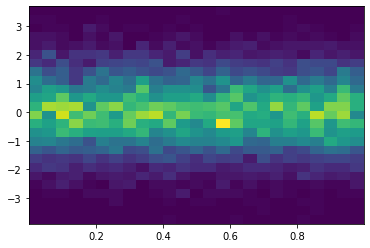

In [4]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

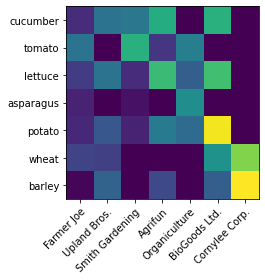

In [5]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]     
#蔬菜类
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]
#农民类

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])
#定义热力图数据

fig, ax = plt.subplots()  
#将元组分解为fig和ax两个变量 
im = ax.imshow(harvest)   
#显示图片


ax.set_xticks(np.arange(len(farmers)))    
#设置x轴刻度间隔
ax.set_yticks(np.arange(len(vegetables)))    
#设置y轴刻度间隔
ax.set_xticklabels(farmers)        
#设置x轴标签'''
ax.set_yticklabels(vegetables)     
#设置y轴标签'''

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
#设置标签 旋转45度 ha有三个选择：right,center,left（对齐方式）


# for i in range(len(vegetables)):
#     for j in range(len(farmers)):
#         text = ax.text(j, i, harvest[i, j],
#                        ha="center", va="center", color="w")
'''
画图
j,i:表示坐标值上的值
harvest[i, j]表示内容
ha有三个选择：right,center,left（对齐方式）
va有四个选择：'top', 'bottom', 'center', 'baseline'（对齐方式）
color:设置颜色
'''

# ax.set_title("Harvest of local farmers (in tons/year)")      
#设置题目
fig.tight_layout()  #自动调整子图参数,使之填充整个图像区域。
plt.show()      #图像展示

In [6]:
label[0]

tensor([[[0.9285, 0.2536, 0.4214, 0.7223, 0.8552, 0.4485, 0.9244, 0.6659],
         [0.4143, 0.4263, 0.0936, 0.9330, 0.8984, 0.1050, 0.6380, 0.4451],
         [0.1204, 0.5285, 0.6295, 0.1243, 0.0966, 0.0404, 0.6106, 0.1900],
         [0.4472, 0.0715, 0.9380, 0.5686, 0.2383, 0.4118, 0.9210, 0.1641],
         [0.5661, 0.4672, 0.1826, 0.4114, 0.9027, 0.2735, 0.5198, 0.8364],
         [0.1530, 0.8982, 0.6826, 0.6798, 0.7896, 0.9920, 0.3437, 0.1520],
         [0.7479, 0.0159, 0.0182, 0.9959, 0.9931, 0.4462, 0.4907, 0.6491],
         [0.0077, 0.9726, 0.4786, 0.5116, 0.1388, 0.2021, 0.5410, 0.6100]]])

In [7]:
data=label[0].numpy().squeeze()
data

array([[0.928465  , 0.253563  , 0.421441  , 0.722327  , 0.855202  ,
        0.448543  , 0.924418  , 0.665934  ],
       [0.414254  , 0.426318  , 0.0935993 , 0.93295   , 0.898412  ,
        0.104989  , 0.638041  , 0.445051  ],
       [0.12044   , 0.528476  , 0.629517  , 0.124253  , 0.0966157 ,
        0.0404399 , 0.610558  , 0.190036  ],
       [0.447189  , 0.071474  , 0.93802   , 0.568579  , 0.238322  ,
        0.4118    , 0.921032  , 0.164141  ],
       [0.566105  , 0.467158  , 0.18265   , 0.41136   , 0.902708  ,
        0.273508  , 0.519797  , 0.836369  ],
       [0.153012  , 0.898245  , 0.682588  , 0.679755  , 0.78958   ,
        0.99202   , 0.343685  , 0.151983  ],
       [0.747903  , 0.015861  , 0.0182008 , 0.995895  , 0.993145  ,
        0.446156  , 0.490704  , 0.64913   ],
       [0.00768118, 0.972601  , 0.478588  , 0.511559  , 0.138809  ,
        0.202092  , 0.541029  , 0.610018  ]], dtype=float32)

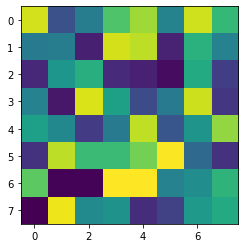

In [8]:
plt.imshow(data)

In [32]:
pre=[[0.5631, 0.1613, 0.2831, 0.1240, 0.8366, 0.5690, 0.7362, 0.4886],
          [0.0742, 0.9606, 0.4491, 0.4479, 0.6530, 0.5563, 0.1661, 0.4700],
          [0.5010, 0.6659, 0.5144, 0.3786, 0.7997, 0.0676, 0.6715, 0.7638],
          [0.0919, 0.0576, 0.5811, 0.3686, 0.8451, 0.2421, 0.0748, 0.8471],
          [0.6665, 0.0609, 0.0922, 0.0808, 0.6040, 0.8294, 0.3668, 0.0388],
          [0.8125, 0.7152, 0.5228, 0.8383, 0.3344, 0.7030, 0.4074, 0.5135],
          [0.6818, 0.2215, 0.6831, 0.5449, 0.5332, 0.6988, 0.5042, 0.5323],
          [0.2559, 0.6910, 0.2404, 0.8101, 0.6730, 0.6057, 0.1841, 0.7367]]

In [33]:
label=[[0.6125, 0.1979, 0.2406, 0.1793, 0.8570, 0.5676, 0.6852, 0.4797],
          [0.0252, 0.9620, 0.4662, 0.4342, 0.5943, 0.5465, 0.0063, 0.4676],
          [0.3534, 0.7350, 0.4841, 0.4371, 0.8043, 0.1661, 0.6479, 0.6845],
          [0.0677, 0.0090, 0.5210, 0.4059, 0.7147, 0.2345, 0.0966, 0.7759],
          [0.5437, 0.2324, 0.0677, 0.1109, 0.7154, 0.7373, 0.4614, 0.0300],
          [0.8700, 0.7075, 0.4881, 0.9723, 0.4534, 0.6483, 0.3494, 0.5438],
          [0.6012, 0.1513, 0.7136, 0.3365, 0.5521, 0.9445, 0.4872, 0.5929],
          [0.2073, 0.6932, 0.2435, 0.9906, 0.8046, 0.4374, 0.2315, 0.7283]]

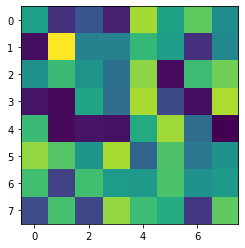

In [34]:
plt.imshow(pre)

No handles with labels found to put in legend.


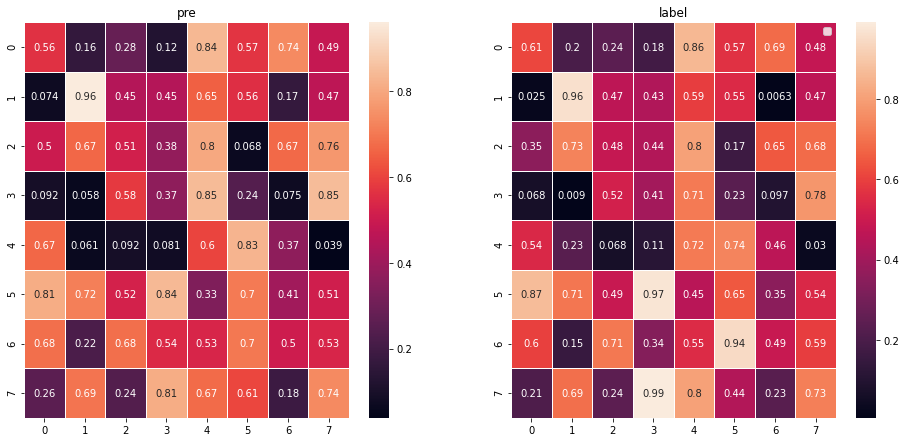

In [35]:
import seaborn as sns
plt.figure(figsize=(16,16))
ax1 =plt.subplot(221)
ax1.set_title('pre')
h=sns.heatmap(pre, annot=True,linewidths=0.5)  

ax2=plt.subplot(222)
ax2.set_title('label')
h=sns.heatmap(label, annot=True,linewidths=0.5)  

plt.legend()
plt.show()

In [36]:
pre=(pre-np.min(pre))/(np.max(pre)-np.min(pre))
label=(label-np.min(label))/(np.max(label)-np.min(label))
label=(label-np.min(pre))/(np.max(pre)-np.min(pre))

No handles with labels found to put in legend.


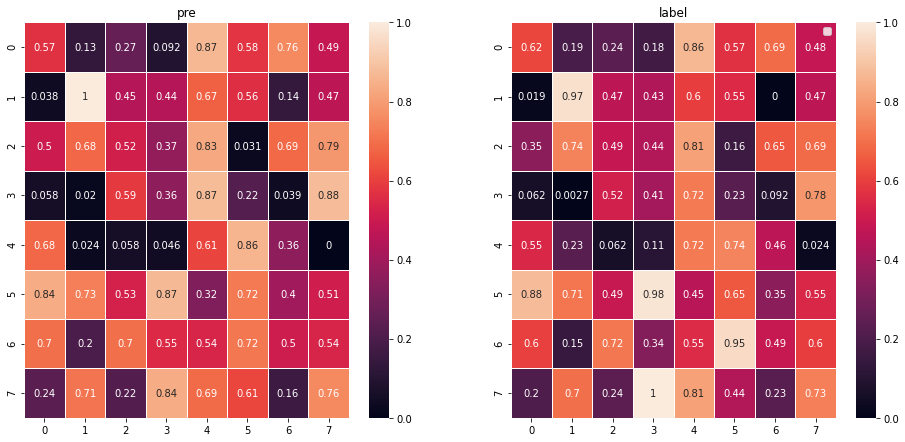

In [37]:
plt.figure(figsize=(16,16))
ax1 =plt.subplot(221)
ax1.set_title('pre')
h=sns.heatmap(pre, annot=True,linewidths=0.5)  

ax2=plt.subplot(222)
ax2.set_title('label')
h=sns.heatmap(label, annot=True,linewidths=0.5)  

plt.legend()
plt.show()